# Image augmentation
## Setup

In [2]:
! python -m ipykernel install --user --name=d2l

import sys
sys.executable

'/home/hendrik/Documents/repos/github/mygists/.venv/bin/python'

In [4]:
import torch
import torchvision
from torch import nn
from d2l import torch as d2l

Load a random image taken from the internet and plot it.
To experiment with different augmentation methods, a generic function `augment` is defined below. 

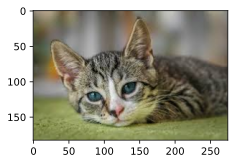

In [5]:
d2l.set_figsize()
img = d2l.Image.open('./cv_augmentation_data/cat.jpeg')
d2l.plt.imshow(img);

In [14]:
img.size

(275, 183)

Define generic function for image augmentation. This function has the following parameters: 

* `img`: the image object
* `fun`: the augmentation function
* `num_rows`, `num_cols`: output dimensions, determines number of augmentations
* `scale`: scale factor for the output images

In [16]:
def augment(img, fun, num_rows = 1, num_cols = 1, scale = 2):
    Y = [fun(img) for _ in range(num_rows * num_cols)]
    d2l.show_images(Y, num_rows, num_cols, scale = scale)

## Flipping and cropping

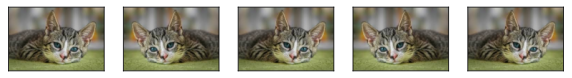

In [7]:
augment(
    img
    , fun = torchvision.transforms.RandomHorizontalFlip()
    , num_cols = 5
)

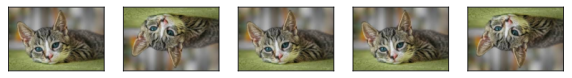

In [8]:
augment(
    img
    , fun = torchvision.transforms.RandomVerticalFlip()
    , num_cols = 5
)

In [11]:
img.size

(275, 183)

In [21]:
type(img)

PIL.JpegImagePlugin.JpegImageFile

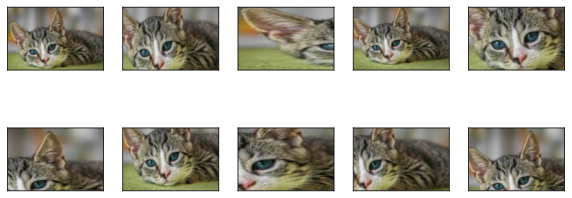

In [13]:
shape_aug = torchvision.transforms.RandomResizedCrop(
    (180, 275)
    , scale = (0.1, 1)
    , ratio = (0.5, 2)
)

augment(
    img
    , shape_aug
    , num_rows = 2
    , num_cols = 5
)

## Changing colors

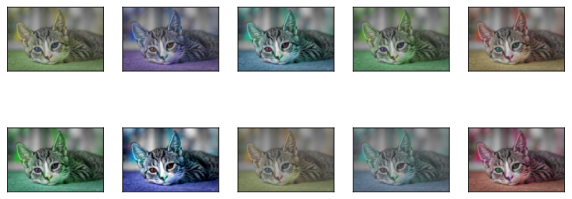

In [25]:
augment(
    img
    , fun = torchvision.transforms.ColorJitter(
        brightness = 0 # (0.1, 0.9)
        , contrast = 0.5
        , saturation = 0
        , hue = 0.5
    )
    , num_rows = 2
    , num_cols = 5
)

## Combine multiple augmentation methods

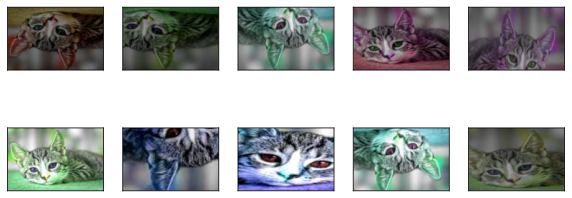

In [26]:
multi = torchvision.transforms.Compose([
    torchvision.transforms.RandomHorizontalFlip()
    , torchvision.transforms.RandomVerticalFlip()
    , torchvision.transforms.ColorJitter(
        brightness = 0.5
        , contrast = 0.5
        , saturation = 0
        , hue = 0.5
    )
    , torchvision.transforms.RandomResizedCrop(
        (180, 275)
        , scale = (0.1, 1)
        , ratio = (0.5, 2)
    )
])

augment(
    img
    , fun = multi
    , num_rows = 2
    , num_cols = 5
)

## Training with image augmentation

In [ ]:
# all_images = torchvision.datasets.CIFAR10(
#     train = True
#     , root = './cv_augmentation_data/'
#     , download = True
# )

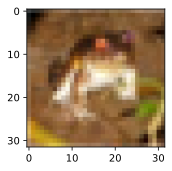

In [50]:
d2l.plt.imshow(all_images[0][0]);
# all_images[0][0]

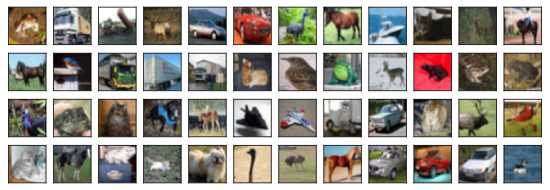

In [53]:
d2l.show_images(
    [all_images[i][0] for i in range(4 * 12)]
    , num_rows = 4
    , num_cols = 12
    , scale = 0.8
);

Image augmentation is applied to training data only. Also images are transformed to tensors which is the format required by the DL framework (32-bit float, shape with batch size, number of channels, height, width).

In [54]:
augment_train = torchvision.transforms.Compose([
     torchvision.transforms.RandomHorizontalFlip()
     , torchvision.transforms.RandomVerticalFlip()
     , torchvision.transforms.ToTensor()
])

augment_test = torchvision.transforms.Compose([
     torchvision.transforms.ToTensor()
])